In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['who-suicide-statistics', 'suicide-rates-overview-1985-to-2016']


In [2]:
df = pd.read_csv('../input/who-suicide-statistics/who_suicide_statistics.csv')
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [3]:
#Create column with number of suicides per 100k people
df['rate_per_100k'] = df['suicides_no'] / (df['population'] / 100000)

Let's look at just the data for the USA.

In [4]:
usa_df = df.loc[df['country']=='United States of America',]
usa_df.reset_index(drop=True,inplace=True)

In [5]:
usa_df.head()

,country,year,sex,age,suicides_no,population,rate_per_100k
0,United States of America,1979,female,15-24 years,1001.0,21039000.0,4.757831
1,United States of America,1979,female,25-34 years,1352.0,18176000.0,7.438380
2,United States of America,1979,female,35-54 years,2458.0,24669000.0,9.963922
3,United States of America,1979,female,5-14 years,48.0,17317000.0,0.277184
4,United States of America,1979,female,55-74 years,1705.0,20097000.0,8.483853


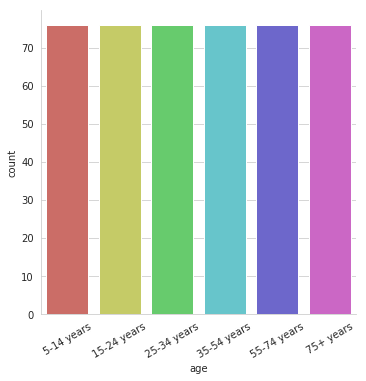

In [19]:
usa_age_s = sns.catplot(x='age',data=usa_df, palette='hls', kind='count',
                order=['5-14 years','15-24 years','25-34 years','35-54 years',
                      '55-74 years','75+ years']).set_xticklabels(rotation=30)

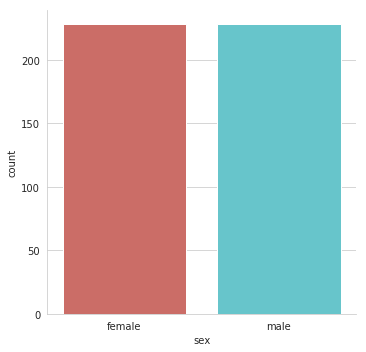

In [28]:
g = sns.catplot(x='sex',data=usa_df, palette='hls', kind='count')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Number of Suicides per Age Group in the USA: 1979-2015')

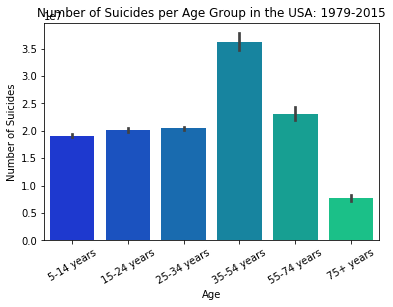

In [6]:
usa_age_s = sns.barplot(x='age',y='population',data=usa_df, palette='winter',
                order=['5-14 years','15-24 years','25-34 years','35-54 years',
                      '55-74 years','75+ years'])
usa_age_s.set_xticklabels(usa_age_s.get_xticklabels(), rotation=30)
usa_age_s.set_xlabel('Age')
usa_age_s.set_ylabel('Number of Suicides')
usa_age_s.set_title('Number of Suicides per Age Group in the USA: 1979-2015')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Number of Suicides per Age Group in the USA: 1979-2015')

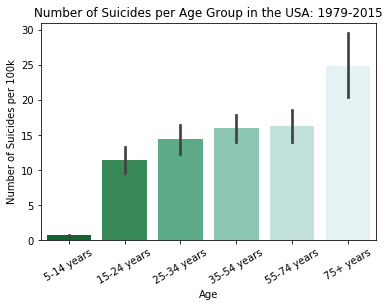

In [7]:
usa_age_s = sns.barplot(x='age',y='rate_per_100k',data=usa_df, palette='BuGn_r',
                order=['5-14 years','15-24 years','25-34 years','35-54 years',
                      '55-74 years','75+ years'])
usa_age_s.set_xticklabels(usa_age_s.get_xticklabels(), rotation=30)
usa_age_s.set_xlabel('Age')
usa_age_s.set_ylabel('Number of Suicides per 100k')
usa_age_s.set_title('Number of Suicides per Age Group in the USA: 1979-2015')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0.98, 'Number of suicides per 100k: USA')

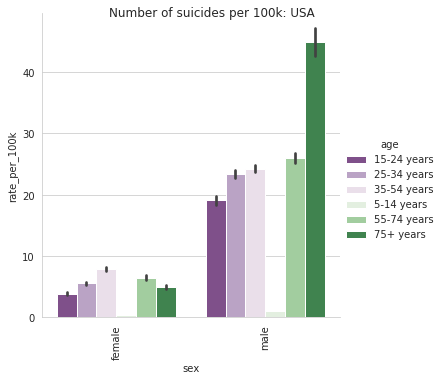

In [31]:
sns.set_style("whitegrid")
g=sns.catplot(x="sex",y="rate_per_100k", hue="age", kind="bar", data=usa_df, palette='PRGn').set_xticklabels(rotation=90)
(g.fig.suptitle('Number of suicides per 100k: USA'))

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Number of Suicides per Year: USA')

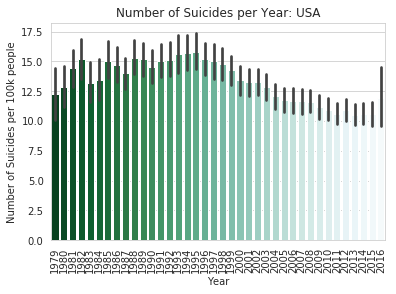

In [9]:
sns.set_style("whitegrid")
usa_year_s = sns.barplot(x='year',y='rate_per_100k',data=df, palette='BuGn_r')
                
usa_year_s.set_xticklabels(usa_year_s.get_xticklabels(), rotation=90)
usa_year_s.set_xlabel('Year')
usa_year_s.set_ylabel('Number of Suicides per 100k people')
usa_year_s.set_title('Number of Suicides per Year: USA')

In [10]:
usa_decades = usa_df.loc[usa_df['year'].isin(['1985', '1995', '2005', '2015'])]

(<seaborn.axisgrid.FacetGrid at 0x7fe2d4953a90>,
 <seaborn.axisgrid.FacetGrid at 0x7fe2d4953a90>)

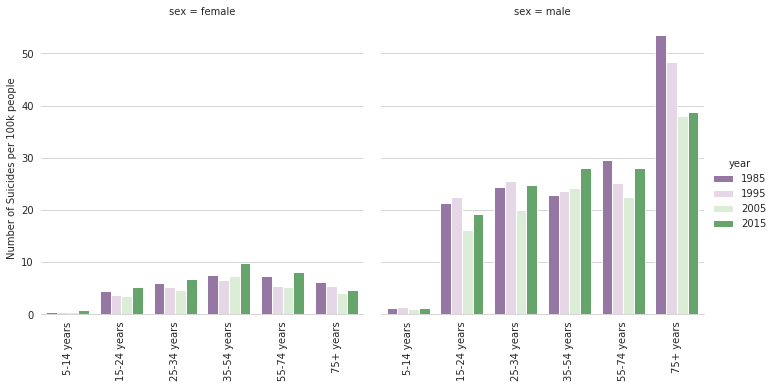

In [32]:
sns.set_style("whitegrid")
g=sns.catplot(x="age",y="rate_per_100k",  col='sex', hue="year", kind="bar",palette='PRGn', data=usa_decades,order=['5-14 years','15-24 years','25-34 years','35-54 years',
                      '55-74 years','75+ years']).set_xticklabels(rotation=90)

(g.despine(left=True),g.set_axis_labels("", "Number of Suicides per 100k people"))

Text(0.5, 0.98, 'Number of suicides: USA')

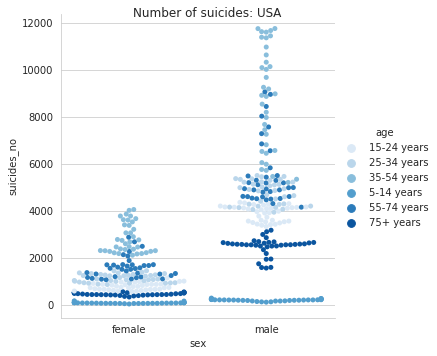

In [12]:
sns.set_style("whitegrid")
sns.set_palette('Blues')
g=sns.catplot(x="sex", y="suicides_no", kind="swarm", hue='age', data=usa_df)
(g.fig.suptitle('Number of suicides: USA'))

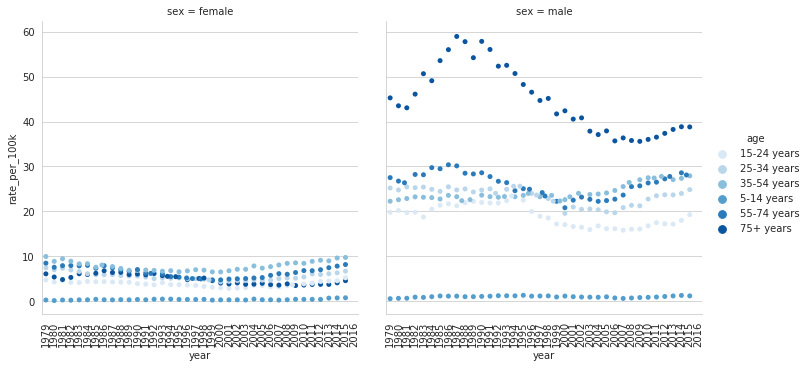

In [33]:
sns.set_style("whitegrid")
sns.set_palette('Blues')
g=sns.catplot(x="year", y="rate_per_100k", kind="swarm", hue='age', col='sex', data=usa_df).set_xticklabels(rotation=90)


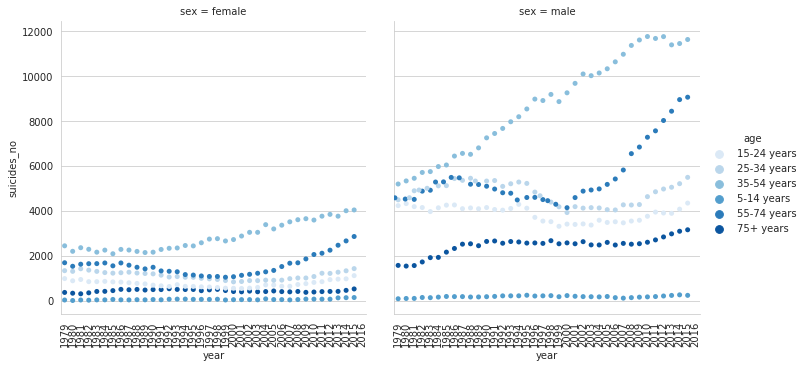

In [34]:
sns.set_style("whitegrid")
sns.set_palette('Blues')
g=sns.catplot(x="year", y="suicides_no", kind="swarm", hue='age', col='sex', data=usa_df).set_xticklabels(rotation=90)

In [14]:
usa_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'rate_per_100k'],
      dtype='object')